In [21]:
import dask
import dask.distributed
import os

import numpy.distutils.fcompiler.gnu

In [49]:
compiler = numpy.distutils.fcompiler.gnu.Gnu95FCompiler()
compiler.customize()

In [24]:
# client = dask.distributed.Client('localhost:8786')

In [50]:
def com(files, compiler=compiler):
    print 'Compiling: {}'.format(files)
    return compiler.compile(sources=[files[0]])[0]

In [51]:
def lin(files, compiler=compiler):
    print 'Linking: {}'.format(files)
    return compiler.link_executable(files, 'main.exe')

In [52]:
dsk = {'file1': (com, ['file1.f90']),
       'file2': (com, ['file2.f90']),
       'file3': (com, ['file3.f90', 'file1', 'file2']),
       'main': (com, ['main.f90', 'file1', 'file2', 'file3']),
       'link': (lin, ['file1', 'file2', 'file3', 'main'])}

In [53]:
# client.get(dsk, 'link')
dask.get(dsk, 'link')

Compiling: ['file1.f90']
Compiling: ['file2.f90']
Compiling: ['file3.f90', 'file1.o', 'file2.o']
Compiling: ['main.f90', 'file1.o', 'file2.o', 'file3.o']
Linking: ['file1.o', 'file2.o', 'file3.o', 'main.o']


In [54]:
from dask.dot import dot_graph

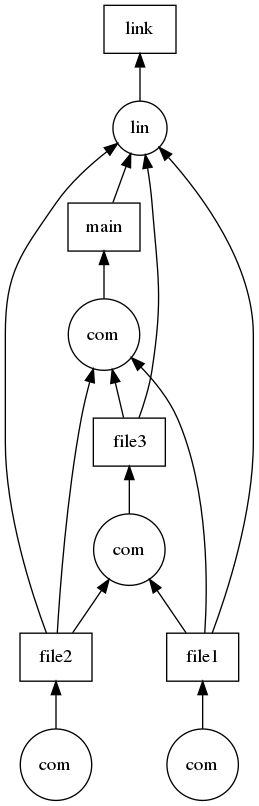

In [55]:
dot_graph(dsk)